# Get Coin, Stock and Gold

## Get coin

In [1]:
# Chuẩn bị thư viện
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
# from vnstock3 import Vnstock
from datetime import date
from bs4 import BeautifulSoup
import datetime
import time
import json
import websocket
# from binance.client import Client
import scipy
import plyer
# from pycoingecko import CoinGeckoAPI
import yfinance as yf
import pandas_datareader as pdr
import quandl

In [2]:
# Defining Binance API URL 
key = "https://api.binance.com/api/v3/ticker/price?symbol="

# Making list for multiple crypto's 
currencies = ["BTCUSDT"] 
j = 0

# running loop to print all crypto prices 
for i in currencies: 
    # completing API for request 
    url = key+currencies[j] 
    data = requests.get(url) 
    data = data.json() 
    j = j+1
    print(f"{data['symbol']} price is {data['price']}") 

BTCUSDT price is 57772.01000000


In [3]:
# Danh sách coin từ coingecko
key = "https://api.coingecko.com/api/v3/coins/list"
data = requests.get(key) 
data = data.json() 
df = pd.DataFrame(data)
df.head()

,id,symbol,name
0,01coin,zoc,01coin
1,0chain,zcn,Zus
2,0dog,0dog,Bitcoin Dogs
3,0-knowledge-network,0kn,0 Knowledge Network
4,0-mee,ome,O-MEE


In [4]:
# Danh sách đồng tiền số
df1 = df["symbol"].unique()
df1 = pd.Series(df1)
df1.head()

0     zoc
1     zcn
2    0dog
3     0kn
4     ome
dtype: object

In [58]:
# Số lượng coin
df["symbol"].nunique()

11441

In [6]:
# Lưu giữ file csv
df1.to_csv("list_coin.csv")

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  


In [7]:
# Lưu trữ file excel
df1.to_excel("list_coin.xlsx")

In [5]:
# Dữ liệu từ coingecko
cg = CoinGeckoAPI()
symbol = "donkee"
df = pd.DataFrame(cg.get_coin_ohlc_by_id(id = symbol, vs_currency = "usd", days = "30")) # 30 ngày gần nhất
df.columns = ["time", "open", "high", "low", "close"]
df["time"] = pd.to_datetime(df["time"], unit = "ms")
df.set_index("time", inplace = True)
df.insert(0, 'symbol', symbol)
df.tail()

,symbol,open,high,low,close
time,,,,,
2024-09-01 12:00:00,donkee,0.000038,0.000038,0.000037,0.000038
2024-09-01 16:00:00,donkee,0.000038,0.000038,0.000037,0.000038
2024-09-01 20:00:00,donkee,0.000038,0.000038,0.000037,0.000038
2024-09-02 00:00:00,donkee,0.000038,0.000038,0.000035,0.000036
2024-09-02 04:00:00,donkee,0.000036,0.000037,0.000036,0.000037


## Get gold

[*********************100%***********************]  1 of 1 completed


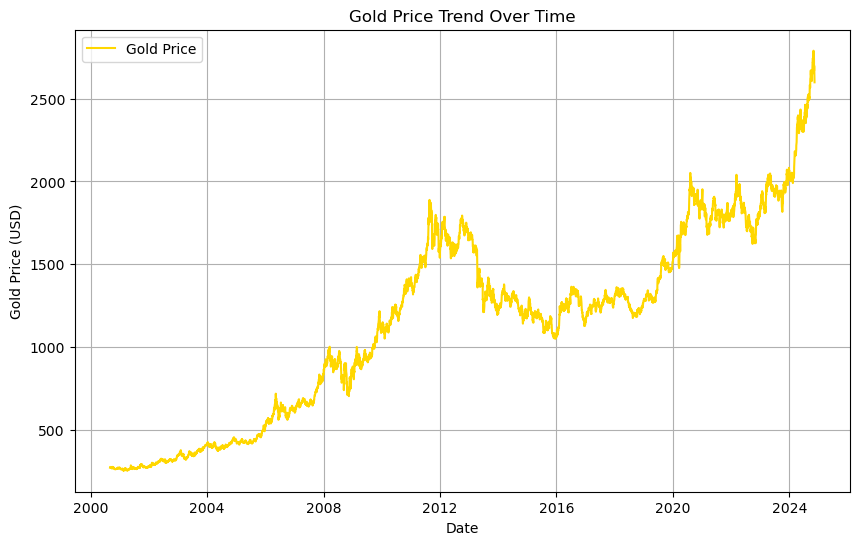

In [2]:
# Use the correct ticker symbol for gold, for example, 'GC=F' (Gold Futures)
# https://pypi.org/project/yfinance/
gold_ticker = 'GC=F'
# Fetch historical data
gold_data = yf.download(gold_ticker, start="2000-01-01", end="2024-12-01")
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(gold_data['Close'], label='Gold Price', color='gold')
plt.title('Gold Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Gold Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
gold_data = yf.download(gold_ticker, start="2000-01-01", end="2024-12-01")
gold_data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-11-06,2734.500000,2734.500000,2659.399902,2667.600098,2667.600098,427
2024-11-07,2662.500000,2699.100098,2662.500000,2698.399902,2698.399902,676
2024-11-08,2688.500000,2694.600098,2682.899902,2687.500000,2687.500000,1038
2024-11-11,2671.699951,2671.699951,2611.199951,2611.199951,2611.199951,1038
2024-11-12,2625.699951,2633.399902,2596.699951,2598.000000,2598.000000,78989


In [4]:
gold_data.to_csv('D:/thuantt2/Document/Big_data_project/data/gold_data202411.csv')

[*********************100%***********************]  1 of 1 completed


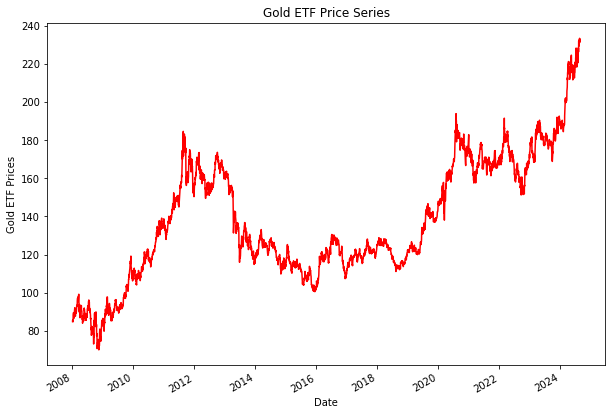

In [8]:
Df = yf.download('GLD', '2008-01-01', '2024-12-01', auto_adjust=True)

# Only keep close columns
Df = Df[['Close']]

# Drop rows with missing values
Df = Df.dropna()

# Plot the closing price of GLD
Df.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("Gold ETF Prices")
plt.title("Gold ETF Price Series")
plt.show()

## Get USA stock price

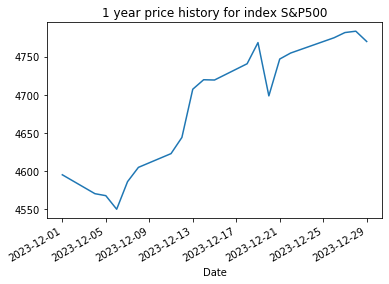

In [9]:
# https://www.relataly.com/using-pandas-datareader-in-python/10934/
# https://www.kaggle.com/code/berkayalan/remote-data-access-with-pandas-beginner
# end = datetime.date.today()

# start = datetime.date(year=2023, month=12, day=30)
# More information of the datasource:
spx_index = pdr.get_data_stooq('^SPX', start = "2023-12-01", end = "2023-12-31")
spx_index['Close'].plot(title='1 year price history for index S&P500')

In [10]:
data = yf.download("^SPX", period="1mo") # 1 tháng
data.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-26,5639.660156,5651.620117,5602.339844,5616.839844,5616.839844,2938570000
2024-08-27,5602.890137,5631.180176,5593.479980,5625.799805,5625.799805,2798990000
2024-08-28,5624.509766,5627.029785,5560.950195,5592.180176,5592.180176,3053450000
2024-08-29,5607.299805,5646.950195,5583.709961,5591.959961,5591.959961,3065640000
2024-08-30,5612.740234,5651.370117,5581.790039,5648.399902,5648.399902,4185850000


## Get VN stock price